In [7]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi, cos, sin

In [8]:
def generate_sphere(n):
    parameters = [(np.random.uniform(0, 2*pi), np.random.uniform(0, pi)) for _ in range(n)]
    x = np.array([cos(s)*sin(t) for s, t in parameters])
    y = np.array([sin(s)*sin(t) for s, t in parameters])
    z = np.array([cos(t) for s, t in parameters])
    return np.vstack((x, y, z))

In [9]:
def generate_uniform_matrix(d=3):
    return np.random.uniform(size=(d, d))

def generate_normal_matrix(d=3):
    return np.random.normal(size=(d, d))

def generate_beta_matrix(d=3):
    return np.random.beta(2, 2, size=(d, d))

In [10]:
def plot_3d(pts1, pts2):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(pts2[0], pts2[1], pts2[2], color='orange', alpha=0.5, s=0.5)
    ax.scatter(pts1[0], pts1[1], pts1[2], alpha=0.5, s=0.5)
    plt.show()

def plot_one(pts):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(pts[0], pts[1], pts[2], color='orange', alpha=0.5, s=0.5)
    plt.show()



def generate_line(int_point, direction, scale):
    begin = int_point
    end = int_point + direction
    end /= np.linalg.norm(end)
    end *= scale
    return np.vstack((begin, end)).T


def plot_with_lines(s, u, v, pts):
    intersection_point = np.average(pts, axis=1)
    lines = []
    for i in range(3):
        line = generate_line(intersection_point, s.T[i], u[i])
        lines.append((line[0], line[1], line[2]))
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(pts[0], pts[1], pts[2], s=0.5, alpha=0.3)
    plt.plot(*lines[0], color='red', linewidth=2, linestyle='-', marker='^')
    plt.plot(*lines[1], color='red', linewidth=2, linestyle='-', marker='^')
    plt.plot(*lines[2], color='red', linewidth=2, linestyle='-', marker='^')
    plt.show()

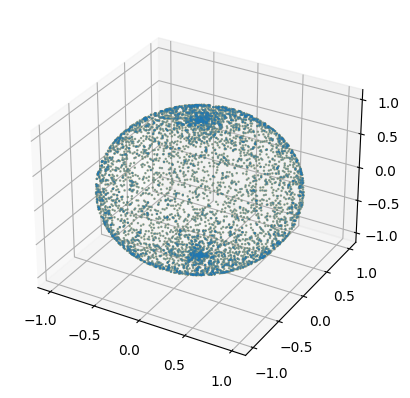

In [11]:
sphere = generate_sphere(5000)
plot_3d(sphere, sphere)

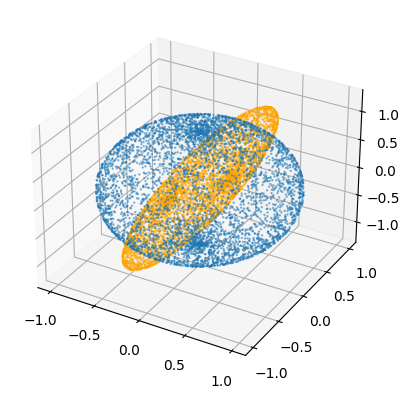

In [12]:
mat1 = generate_uniform_matrix()
plot_3d(sphere, np.matmul(mat1, sphere))

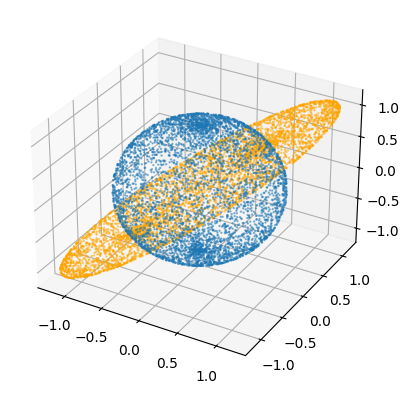

In [13]:
mat2 = generate_uniform_matrix()
plot_3d(sphere, np.matmul(mat2, sphere))

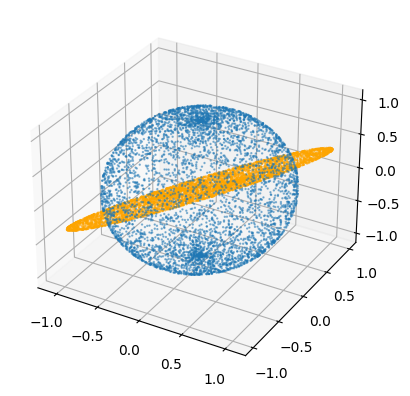

In [14]:
mat3 = generate_uniform_matrix()
plot_3d(sphere, np.matmul(mat3, sphere))

In [15]:
S, U, V = np.linalg.svd(mat1)

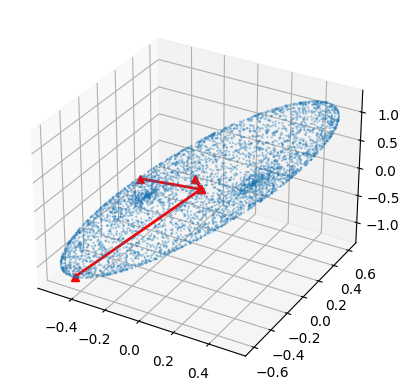

In [16]:
plot_with_lines(S, U, V, np.matmul(mat1, sphere))

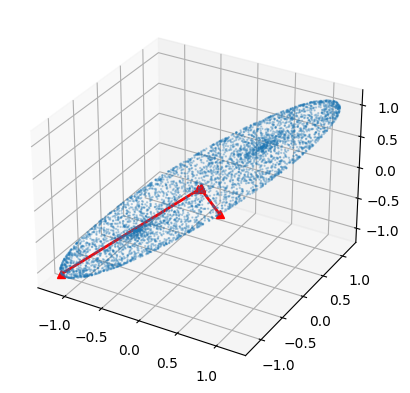

In [17]:
S, U, V = np.linalg.svd(mat2)
plot_with_lines(S, U, V, np.matmul(mat2, sphere))

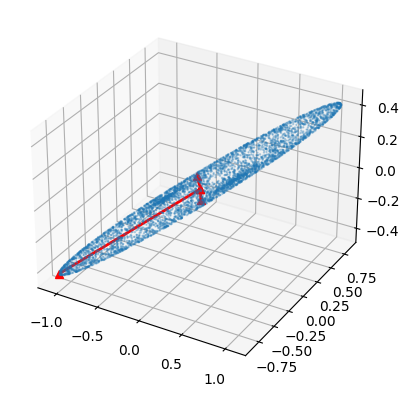

In [18]:
S, U, V = np.linalg.svd(mat3)
plot_with_lines(S, U, V, np.matmul(mat3, sphere))

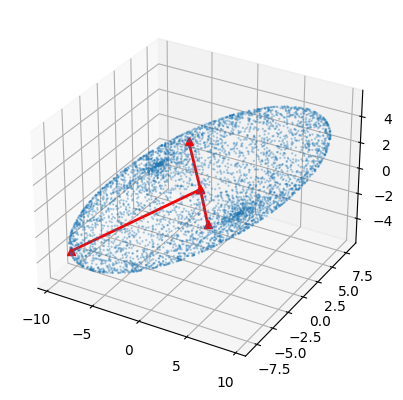

In [19]:
diagonal = np.array([12, 5, 4])
mat4 = S @ np.diag(diagonal) @ V
plot_with_lines(S, diagonal, V, np.matmul(mat4, sphere))

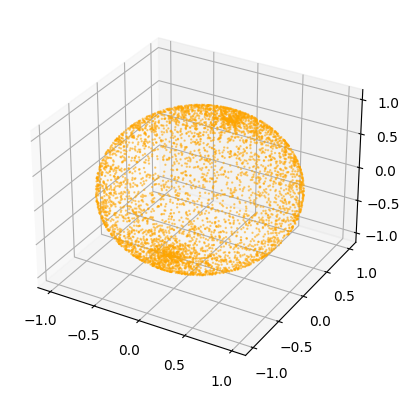

In [26]:
S, U, V = np.linalg.svd(mat4)
mat = V @ sphere
plot_one(mat)

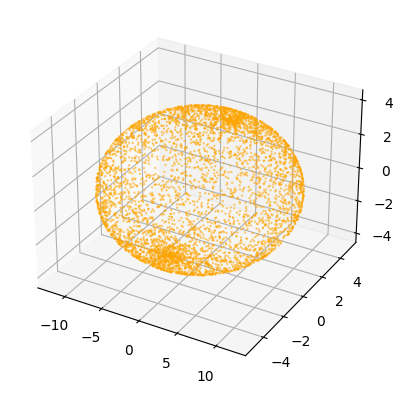

In [27]:
mat = np.diag(U) @ mat
plot_one(mat)

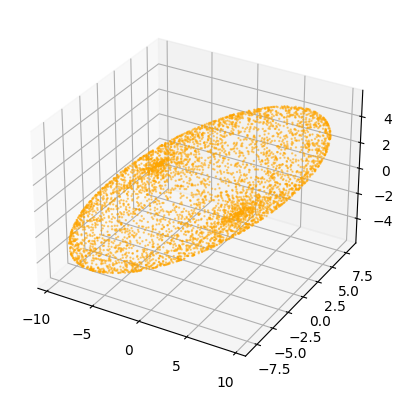

In [28]:
mat = S @ mat
plot_one(mat)